In [ ]:
! pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 26.2 MB/s eta 0:00:00


# Load Data

In [ ]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))


In [ ]:
df = pd.read_csv('data/cleaned_df.csv')

In [ ]:
df

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,imUrl,categories,title,price,review_length
0,A2R3K1KX09QBYP,0000031887,alert consumer,the tutu color was very nice. the only issue w...,2.0,not very good material.,1.361059e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,236
1,A1RLQXYNCMWRWN,0000031887,Carola,What can I say... my daughters have it in oran...,5.0,I have buy more than one,1.357258e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,312
2,A8U3FAMSJVHS5,0000031887,Caromcg,"We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1.398557e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,405
3,AEXHAUK8HZPV2,0000031887,Grrreatstuff,My daughter's first request out of bed in the ...,4.0,Perfect princess in purple,1.361146e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,401
4,AVJ2W6ICJZNO7,0000031887,i love my 8 children,my little 3 year old and 1 year old love dress...,5.0,So Cute !,1.358035e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,98
...,...,...,...,...,...,...,...,...,...,...,...,...
3060215,A2Q59WC25TVR1O,B00LNU0V5K,Natty Girl,Absolutely loved this book. Casey & Grace will...,5.0,Gracey Love...,1.405642e+09,http://ecx.images-amazon.com/images/I/41C2Bue8...,"[['Books', 'Literature & Fiction'], ['Books', ...",NaN,2.99,1269
3060216,A2S9JNZ43F2IRR,B00LNU0V5K,Sarah Griffin - Books to Breathe,I&#8217;m not quite sure why it took me so lon...,5.0,Epic Book Hangover,1.405555e+09,http://ecx.images-amazon.com/images/I/41C2Bue8...,"[['Books', 'Literature & Fiction'], ['Books', ...",NaN,2.99,3800
3060217,A214XO8CSK6LR7,B00LNU0V5K,SpiderEffect,Headed to Sydney to fill in as bassist for Jam...,5.0,My favorite book of the series....,1.405296e+09,http://ecx.images-amazon.com/images/I/41C2Bue8...,"[['Books', 'Literature & Fiction'], ['Books', ...",NaN,2.99,2680
3060218,A3FQPESOTN6T47,B00LNU0V5K,T. Zautner,6 Stars(Just an FYI I am about to get real gus...,5.0,"Casey and Grace never failed to captivate, ent...",1.405728e+09,http://ecx.images-amazon.com/images/I/41C2Bue8...,"[['Books', 'Literature & Fiction'], ['Books', ...",NaN,2.99,4097


# EDA

## Dataframe info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060220 entries, 0 to 3060219
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   reviewerID      object 
 1   asin            object 
 2   reviewerName    object 
 3   reviewText      object 
 4   overall         float64
 5   summary         object 
 6   unixReviewTime  float64
 7   imUrl           object 
 8   categories      object 
 9   title           object 
 10  price           float64
 11  review_length   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 280.2+ MB


In [ ]:
df.describe()

,overall,unixReviewTime,price,review_length
count,3.060220e+06,3.060220e+06,2.742013e+06,3.060220e+06
mean,4.226937e+00,1.326897e+09,2.668890e+01,7.075680e+02
std,1.124133e+00,9.390434e+07,5.718785e+01,9.457435e+02
min,1.000000e+00,8.430048e+08,0.000000e+00,0.000000e+00
25%,4.000000e+00,1.310083e+09,5.990000e+00,1.790000e+02
50%,5.000000e+00,1.362874e+09,1.039000e+01,3.600000e+02
75%,5.000000e+00,1.386461e+09,2.390000e+01,8.400000e+02
max,5.000000e+00,1.406074e+09,9.999900e+02,3.268900e+04


In [ ]:
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,imUrl,categories,title,price,review_length
0,A2R3K1KX09QBYP,0000031887,alert consumer,the tutu color was very nice. the only issue w...,2.0,not very good material.,1.361059e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,236
1,A1RLQXYNCMWRWN,0000031887,Carola,What can I say... my daughters have it in oran...,5.0,I have buy more than one,1.357258e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,312
2,A8U3FAMSJVHS5,0000031887,Caromcg,"We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1.398557e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,405
3,AEXHAUK8HZPV2,0000031887,Grrreatstuff,My daughter's first request out of bed in the ...,4.0,Perfect princess in purple,1.361146e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,401
4,AVJ2W6ICJZNO7,0000031887,i love my 8 children,my little 3 year old and 1 year old love dress...,5.0,So Cute !,1.358035e+09,http://ecx.images-amazon.com/images/I/314qZjYe...,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",Ballet Dress-Up Fairy Tutu,6.79,98


## Rating distribution

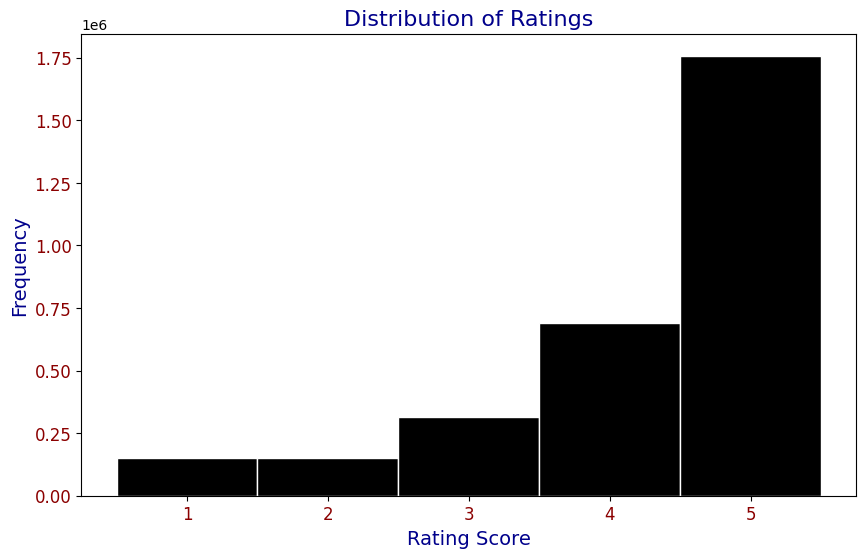

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['overall'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color='black', edgecolor='white')
plt.title('Distribution of Ratings', fontsize=16, color='darkblue')
plt.xlabel('Rating Score', fontsize=14, color='darkblue')
plt.ylabel('Frequency', fontsize=14, color='darkblue')
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')

plt.show()

## Review length distribution

Text(0, 0.5, 'Frequency')

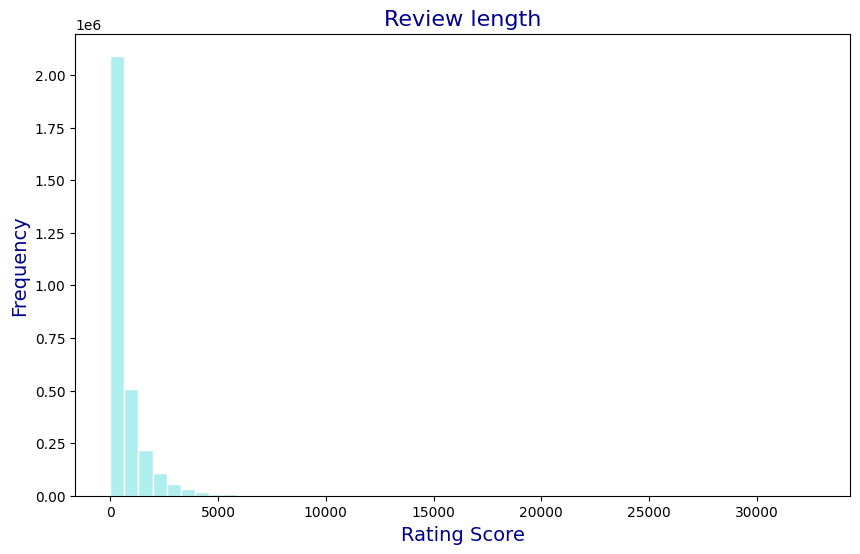

In [ ]:
# Plot the review length dist
plt.figure(figsize=(10, 6))
df['review_length'].hist(bins=50,edgecolor='white',grid=False,color='darkblue')
plt.title('Review length', fontsize=16, color='darkblue')
plt.xlabel('Rating Score', fontsize=14, color='darkblue')
plt.ylabel('Frequency', fontsize=14, color='darkblue')


## Review time distribution

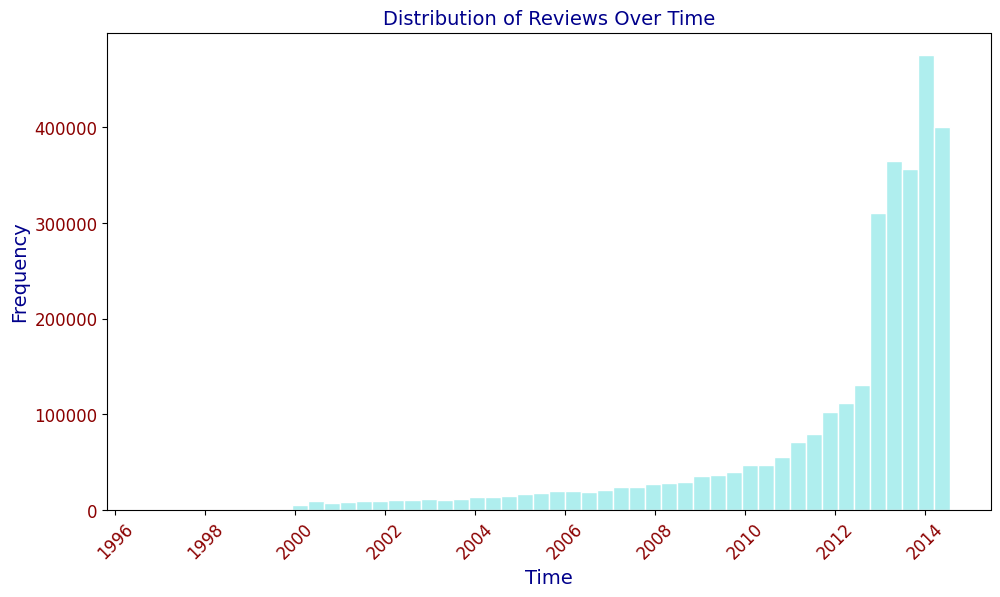

In [ ]:
df['unixReviewTime'] = pd.to_datetime(df['unixReviewTime'] )

# Create a histogram of the timestamps
plt.figure(figsize=(10,6))
plt.hist(df['unixReviewTime'], bins=50, edgecolor='w',color='paleturquoise')

plt.xlabel('Time',color='darkblue', fontsize=14)
plt.ylabel('Frequency',color='darkblue', fontsize=14)

plt.title('Distribution of Reviews Over Time',color='darkblue', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')
plt.show()

## Top 10 items and reviewers

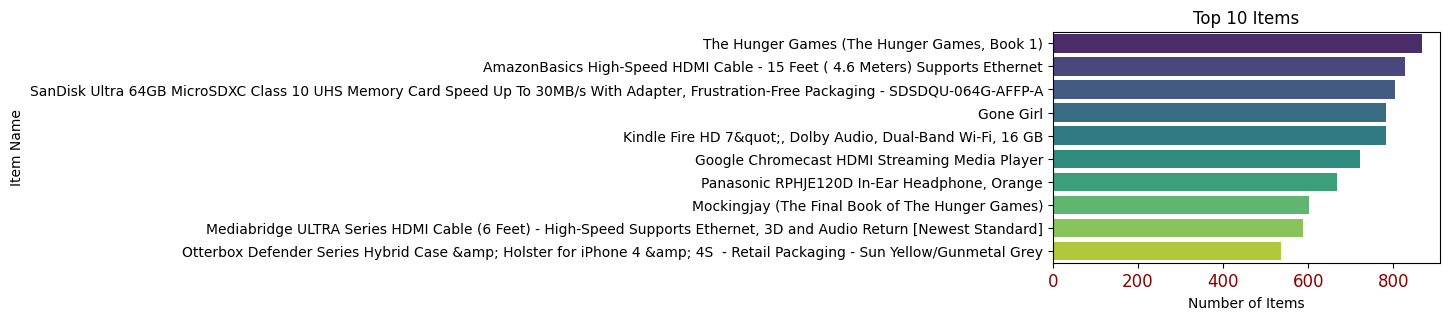

In [ ]:

top_items = df['title'].value_counts().head(10)

# Create a horizontal countplot
plt.figure(figsize=(5, 3))
sns.countplot(data=df[df['title'].isin(top_items.index)], y='title', order=top_items.index, palette='viridis')

plt.xlabel('Number of Items')
plt.ylabel('Item Name')
plt.title('Top 10 Items')

plt.xticks(fontsize=12, color='darkred')
plt.show()

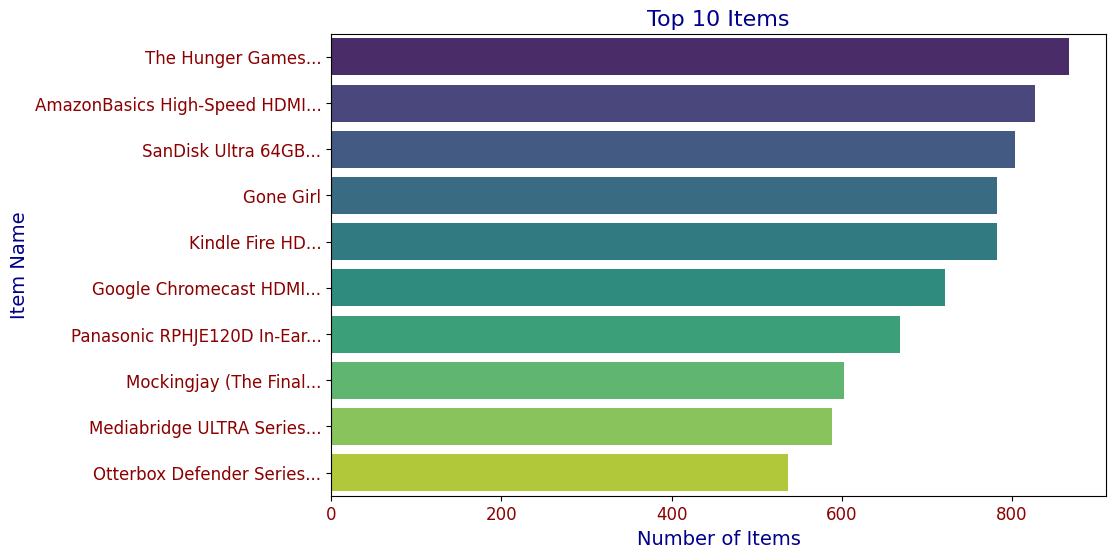

In [ ]:
# Find the top 10 items based on the number of reviews
top_items = df['title'].value_counts().head(10)

# Create a horizontal countplot with limited y label word count
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df[df['title'].isin(top_items.index)], y='title', order=top_items.index, palette='viridis')

# Limit the y-axis label word count
ax.set_yticklabels([' '.join(label.get_text().split()[:3]) + '...' if len(label.get_text().split()) > 3 else label.get_text() for label in ax.get_yticklabels()])

plt.xlabel('Number of Items',color='darkblue', fontsize=14)
plt.ylabel('Item Name',color='darkblue', fontsize=14)
plt.title('Top 10 Items',color='darkblue', fontsize=16)
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')
plt.show()

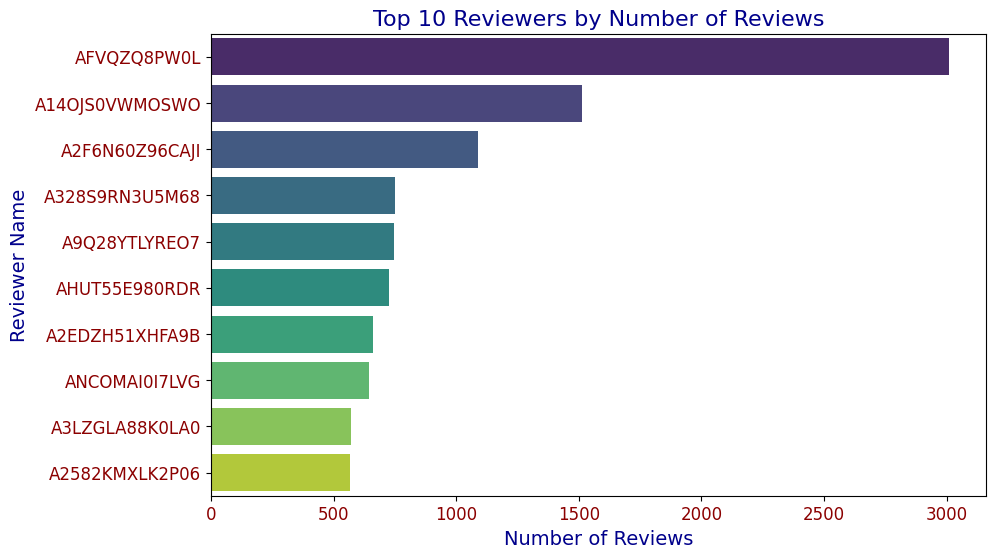

In [ ]:
# Find the top 10 reviewers based on the number of reviews
top_reviewers = df['reviewerID'].value_counts().head(10)

# Create a horizontal countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['reviewerID'].isin(top_reviewers.index)], y='reviewerID', order=top_reviewers.index, palette='viridis')
plt.xlabel('Number of Reviews',color='darkblue', fontsize=14)
plt.ylabel('Reviewer Name',color='darkblue', fontsize=14)
plt.title('Top 10 Reviewers by Number of Reviews',color='darkblue', fontsize=16)

plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')
plt.show()

## Check some extreme value

In [ ]:
df_long = df[df['review_length'] > 30000]
df_long['reviewText'].iloc[1]

'With his fantastic, balanced and absorbing writing, Mr. Ari Shavit places me in every historically significant event that has created and shaped the State of Israel that I have come to know from various media outlets that have portrayed and "reported on" the profound daily life and death struggles between the Israeli-Jews and Israeli-Palestinians.I heard a radio interview of Mr. Shavit by Terry Gross on her Fresh Air show and was mesmerized by what Mr. Shavit was saying, prompting me to buy this book from Amazon to read.I also hope to better understand why Professor Ze\'ev Sternhell, "a lauded political activist against Israeli fascism, told Mr. Shavit: "To be a Jew was to have to run away all the time."While Mr. Shavit\'s book is captivating, the subjects and topics he elaborates upon are so infinitely complex (yet need to be understood by everyone who cares about humanity) that I will write my review of this book piecemeal -- so that I can accurately capture the moral, human and his

They do contain useful informations. So, we will keep it.